In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial


from sklearn.model_selection import train_test_split


## Preprocessing

In [2]:
df = pd.read_csv(r'C:\Users\victo\Desktop\kaggle\coupon\in-vehicle-coupon-recommendation.csv')
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [3]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [4]:
print(df.nunique(axis=0).sort_values())

toCoupon_GEQ5min         1
Y                        2
direction_same           2
toCoupon_GEQ25min        2
toCoupon_GEQ15min        2
direction_opp            2
expiration               2
gender                   2
has_children             2
destination              3
temperature              3
weather                  3
passanger                4
coupon                   5
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
time                     5
maritalStatus            5
education                6
age                      8
income                   9
occupation              25
dtype: int64


In [5]:
#OHE gender and expiration  
#we drop direction_opp since it is constant and car because it has too many missing values
df= pd.get_dummies(df,columns =['gender','expiration'],drop_first=True )
df.drop(columns = ['direction_opp','car',],inplace=True)

In [6]:
#toCoupon_GEQ5min is a constant value so it can be dropped       
df.drop(columns = ['toCoupon_GEQ5min'],inplace=True)

In [13]:
'''def ordinal_encode(data):
    df = data.copy()
    df["age"].replace({'below21': 0, "21": 1, "26":2, "31": 3, "36":4, "41":5,"46":6,"50plus":7}, inplace=True)
    
    df['time'].replace({'2PM': 14, '10AM': 10, "6PM": 18, "7AM": 7, "10PM": 22} , inplace=True)
    
    df['income'].replace({'Less than $12500':0, '$12500 - $24999':1 ,'$25000 - $37499':2,
           '$37500 - $49999':3, '$50000 - $62499':4, '$62500 - $74999':5,
           '$75000 - $87499':6, '$87500 - $99999':7,'$100000 or More':8},inplace=True)
    
    df['education'].replace({'Some High School':0, 'High School Graduate':1 ,'Some college - no degree':2,
           'Associates degree':3, 'Bachelors degree':4, 'Graduate degree (Masters or Doctorate)':5,
                                                                           },inplace=True)
    df['temperature'].replace({30:0, 55:1,80:2},inplace=True)
    return df
df= ordinal_encode(df)'''

In [7]:
df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
Y                         0
gender_Male               0
expiration_2h             0
dtype: int64

In [8]:
#Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 has nans but will still be one hot encoded

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, df.Y.values, test_size=0.30, random_state=714)


In [9]:
X_train.head()

,destination,passanger,weather,temperature,time,coupon,age,maritalStatus,has_children,education,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,gender_Male,expiration_2h
1571,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,31,Single,0,High School Graduate,...,never,1~3,less1,never,0,0,0,0,1,0
10188,No Urgent Place,Friend(s),Sunny,30,10PM,Carry out & Take away,50plus,Widowed,1,Some college - no degree,...,never,1~3,4~8,less1,1,0,0,1,0,0
1100,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),41,Married partner,1,Associates degree,...,less1,4~8,1~3,less1,0,0,0,0,0,0
3325,Home,Alone,Sunny,80,6PM,Coffee House,36,Married partner,1,Graduate degree (Masters or Doctorate),...,4~8,1~3,1~3,less1,0,0,0,1,1,1
942,Work,Alone,Sunny,80,7AM,Restaurant(20-50),31,Single,0,Graduate degree (Masters or Doctorate),...,4~8,4~8,4~8,4~8,1,0,0,0,0,0


## EDA

In [10]:
#Categorical Features

Text(0.5, 0.98, 'Education')

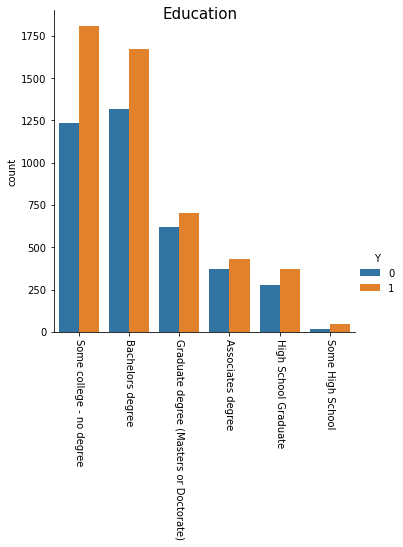

In [14]:
ax = sns.catplot(x="education", kind="count", hue='Y', data=X_train,order=X_train['education'].value_counts().index)
plt.xticks(rotation=-90)
ax.set(xlabel=None)
ax.fig.suptitle('Education',fontsize=15)

In [26]:
age = df[['Y','age']]
age["age"].replace({'below21': 0, "21": 1, "26":2, "31": 3, "36":4, "41":5,"46":6,"50plus":7}, inplace=True)
age

E:\ANACONDA\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Y,age
0,1,1
1,0,1
2,1,1
3,0,1
4,0,1
...,...,...
12679,1,2
12680,1,2
12681,0,2
12682,0,2


Text(0.5, 1.0, 'Age')

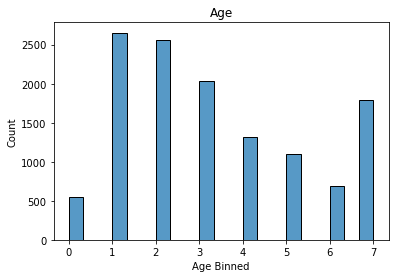

In [38]:
axes = sns.histplot(data=age, x='age')
axes.set_xlabel('Age Binned')
axes.set_title('Age')

TypeError: list indices must be integers or slices, not float

In [58]:
range(5)

range(0, 5)

Figure(432x288)


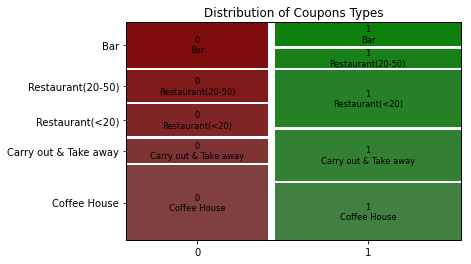

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#crosstable= pd.crosstab(temp['Y'],temp['coupon'])
print(mosaic(X_train, ['Y','coupon'], gap=0.02,title='Distribution of Coupons Types',statistic=False,axes_label=True)[0])

In [23]:
def make_stack_graph(x):
    stacked_columns =['toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'gender_Male', 'expiration_2h',]
    xtab= pd.crosstab(df[x], df['Y'],normalize='index')
    plt.style.use('ggplot')
    xtab.plot(kind='bar',stacked=True,layout='tight',figsize=(10,10),color=['red','green'])
    plt.ylabel("Percentage of Users")
    plt.xticks(rotation='horizontal')
    plt.title('Distribution of Users')
    plt.xlabel('')
    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.legend(loc="upper left")
stacked_columns =['toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'gender_Male', 'expiration_2h',]

Text(0.5, 0, '15 Minutes Away From Location')

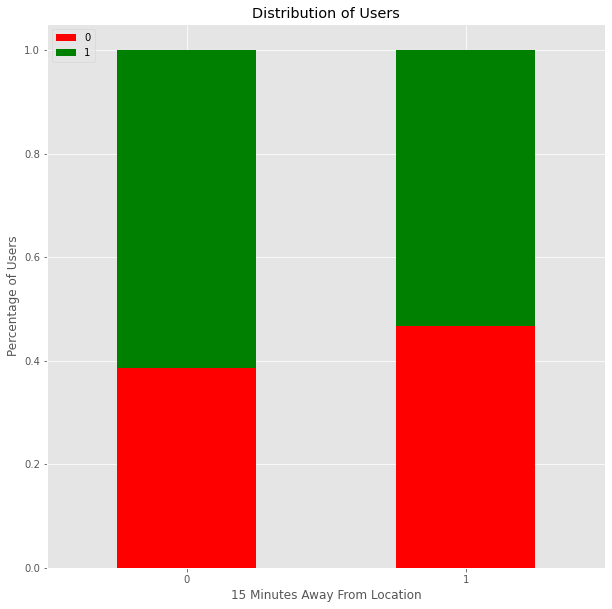

In [24]:
make_stack_graph(stacked_columns[0])
plt.xlabel('15 Minutes Away From Location')

Text(0.5, 0, 'toCoupon_GEQ25min')

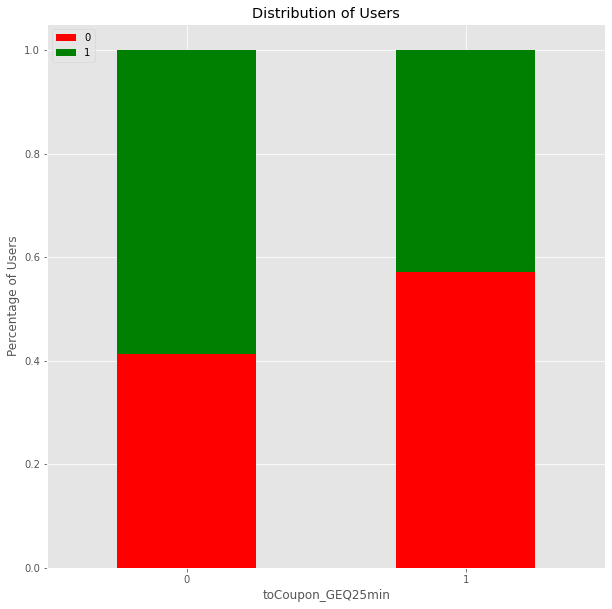

In [25]:
make_stack_graph(stacked_columns[1])
plt.xlabel(f'{stacked_columns[1]}')

Text(0.5, 0, 'direction_same')

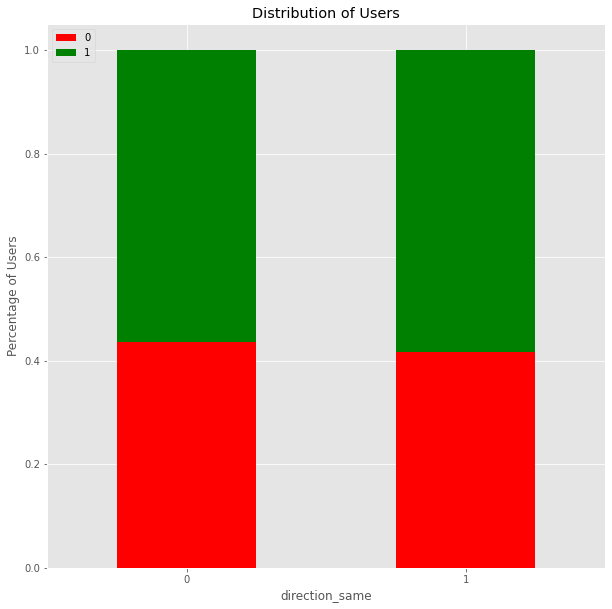

In [26]:
make_stack_graph(stacked_columns[2])
plt.xlabel(f'{stacked_columns[2]}')

Text(0.5, 0, 'gender_Male')

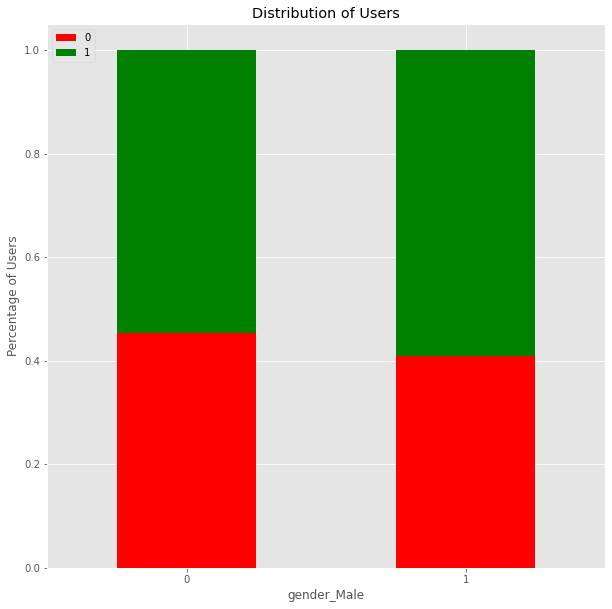

In [27]:
make_stack_graph(stacked_columns[3])
plt.xlabel(f'{stacked_columns[3]}')

Text(0.5, 0, 'expiration_2h')

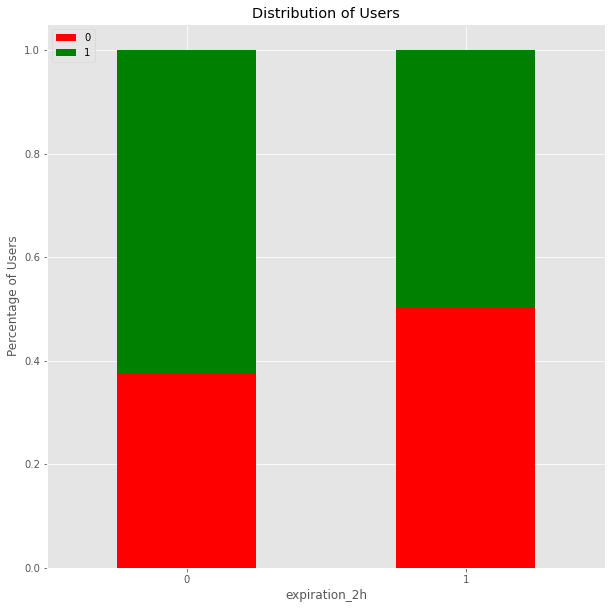

In [28]:
make_stack_graph(stacked_columns[4])
plt.xlabel(f'{stacked_columns[4]}')

## 

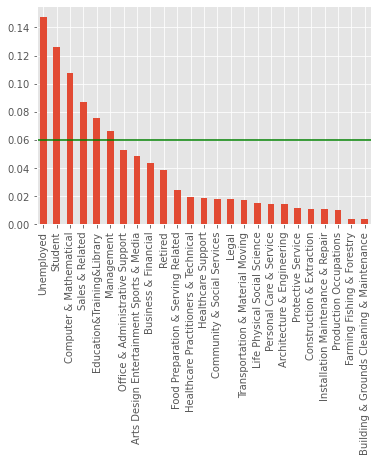

In [29]:
temp = X_train.occupation.value_counts()/X_train.shape[0]
fig = temp.plot.bar()
fig.axhline(y=.06,color = 'green')

In [24]:
def find_freq_cats(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count() / len(df)
    freq = [x for x in temp.loc[temp> tolerance].index.values]
    return freq
labels = find_freq_cats(X_test,'occupation',.06)
labels

['Computer & Mathematical',
 'Education&Training&Library',
 'Management',
 'Sales & Related',
 'Student',
 'Unemployed']